# Example 2. First MNIST training
---

Basing on [Example 1.](example_01_mathNN.ipynb), we know the neural network, a certain complicated model, is possible to sovle the difficult problem. The common and well-studied example for machine learning is the recognition of the writting nubmer. Here we use the popular dataset MNIST for our first training of neural network. The neural network class is imported from [Network.py](Network.py). The method and function definition behind the network are listed in following. The "***Sigmoid function***" is used for *active function*, and the ***Mean square error (quadratic error)*** is used for *cost function*.

#### 1. Active function - "*Sigmoid function*"

$$
\boxed{
a_{j}^{l}=\sigma(z_j^l)=\frac{1}{1+\exp{(-z_{j}^{l})}}\ }\ ,
$$

where the detail properties can be found in [Machine Learning in Python/Chapter 3/Example 2](../../Machine_Learning_in_Python_SR/Chapter_03/example_02_LogisticRegression.ipynb). Due to the sigmoid function is used, the neuron is also called the ***Sigmoid Neuron***. The function is different to the **linear function** which can avoid the large input value from $z$, since sigmoid will limit the value between 1 and 0, when $z\to\infty$ and $z\to-\infty$, respectively. The first differential of *sigmoid function* is 

$$
\begin{split}
\sigma'(z_j^l)&=\frac{\exp(-z_j^l)}{\left[1+\exp{(-z_{j}^{l})}\right]^2}\\
&=\sigma(z_j^l)-\sigma(z_j^l)^2 \\
&=a_{j}^{l}(1-a_{j}^{l}) .
\end{split}
$$


#### 2. Cost function - "*Mean square error (quadratic error)*"

The *mean square error (quadratic error)* cost function for a single data is defined as 

$$
\boxed{
C_x = \frac{1}{2}\left\|a^{L}-y\right\|^2}\ \ ,
$$

where $n$ is the number of input data; Thus, the gradient of $C_x$ with respect to all neurons is 

$$
\nabla_aC_x=a^{L}-y\ .
$$

#### 4. The equations of the backpropagation
By replace the above used *active function* and *cost function*, the four equations of the backpropagation becomes

$$
\boxed{
\begin{equation}
\begin{split}
&\delta^L&=(a^{L}-y)\odot [a^{L}\odot(1-a^{L})] \\
&\delta^l&=((\mathbf{w}^{l+1})^\text{T}\delta^{l+1})\odot[a^{l}\odot(1-a^{l})] \\
&\Delta b_{j}^l&=-\frac{\eta}{n}\sum_x\delta_j^l \\
&\Delta w_{ji}^l&=-\frac{\eta}{n}\sum_x a_i^{l-1}\delta_j^l\ ,
\end{split}
\end{equation}}
$$

where the variation of the weights and biases can be expended as

$$
\begin{equation}
\begin{split}
&\Delta b_{j}^l&=-\frac{\eta}{n}\sum_x \left(\left(\left(\left(\mathbf{w}_j^{l+1}\right)^\text{T}\mathbf{w}_j^{l+2}\right)^\text{T}\dots\mathbf{w}_j^{L}\right)^\text{T}\delta_j^L\right)\,a_j^{L-1}(1-a_j^{L-1})\dots\,a_j^{l+1}(1-a_j^{l+1})\,a_j^{l}(1-a_j^{l})\\
&\Delta w_{ji}^l&=-\frac{\eta}{n}\sum_x a_i^{l-1}\,\left(\left(\left(\left(\mathbf{w}_j^{l+1}\right)^\text{T}\mathbf{w}_j^{l+2}\right)^\text{T}\dots\mathbf{w}_j^{L}\right)^\text{T}\delta_j^L\right)\,a_j^{L-1}(1-a_j^{L-1})\dots\,a_j^{l+1}(1-a_j^{l+1})\,a_j^{l}(1-a_j^{l})\ .
\end{split}
\end{equation}
$$


### Import packages and MNIST data

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sys, math
sys.path.insert(1,'../'); #print sys.path # To import mist_load
from mnist_loader import *
from Network import *

In [2]:
training_data, validation_data, test_data = load_data_wapper('../data/mnist.pkl.gz')
n_imgs_train = np.shape(training_data)[0]
n_imgs_val   = np.shape(validation_data)[0]
n_imgs_test  = np.shape(test_data)[0]
n_pixels     = len(training_data[0][0])
n_class      = len(training_data[0][1])

In [3]:
print 'Number of training images   %d'%( n_imgs_train )
print 'Number of validation images %d'%( n_imgs_val )
print 'Number of test images       %d'%( n_imgs_test )
print 'Number of pixels            %d'% n_pixels
print 'Number of class             %d'% n_class

Number of training images   50000
Number of validation images 10000
Number of test images       10000
Number of pixels            784
Number of class             10


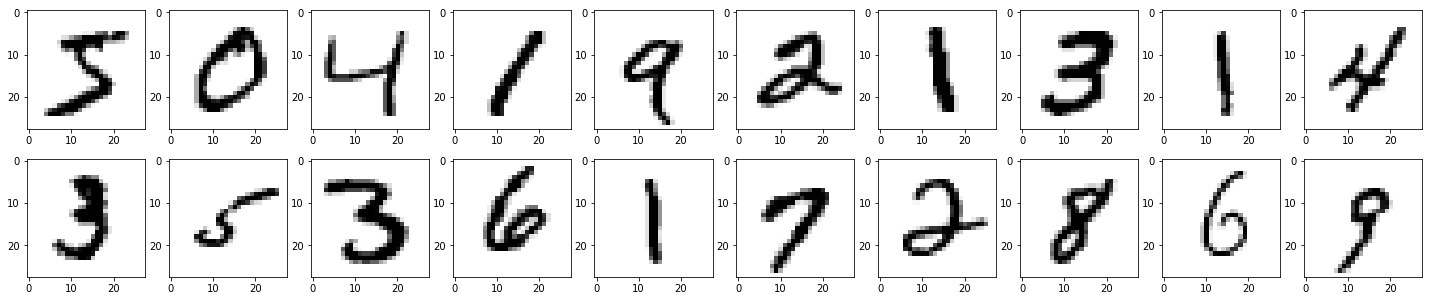

In [4]:
n_shows = 20
fig = plt.figure(figsize=(25,5))
for i in range(0,n_shows):
    X = training_data[i][0]
    fig.add_subplot( math.ceil(n_shows/10), 10, i+1)
    plt.imshow(X.reshape(28,28), cmap ='binary')
plt.show()

### Fist training of MNIST

In [5]:
n_hidenLayer = 30
net = Network([n_pixels, n_hidenLayer, n_class])

In [6]:
epochs = 30
mini_batch_size = 10
net.SGD(training_data, 
        epochs=epochs, 
        mini_batch_size=mini_batch_size, 
        eta=3.0,
        test_data=test_data)

Epoch 0: 8251/10000, 8.76563000679 (sec)
Epoch 1: 8404/10000, 8.7538690567 (sec)
Epoch 2: 8459/10000, 9.09202313423 (sec)
Epoch 3: 9316/10000, 9.24471902847 (sec)
Epoch 4: 9357/10000, 9.26858496666 (sec)
Epoch 5: 9402/10000, 8.80669808388 (sec)
Epoch 6: 9445/10000, 9.01776909828 (sec)
Epoch 7: 9445/10000, 8.67899179459 (sec)
Epoch 8: 9468/10000, 8.68553709984 (sec)
Epoch 9: 9441/10000, 8.74201202393 (sec)
Epoch 10: 9493/10000, 8.67803692818 (sec)
Epoch 11: 9474/10000, 8.76237010956 (sec)
Epoch 12: 9487/10000, 8.66551113129 (sec)
Epoch 13: 9470/10000, 9.53646087646 (sec)
Epoch 14: 9469/10000, 8.67109704018 (sec)
Epoch 15: 9495/10000, 8.6707918644 (sec)
Epoch 16: 9478/10000, 8.67296004295 (sec)
Epoch 17: 9487/10000, 8.64810705185 (sec)
Epoch 18: 9487/10000, 9.01386880875 (sec)
Epoch 19: 9503/10000, 9.21190094948 (sec)
Epoch 20: 9497/10000, 8.65803599358 (sec)
Epoch 21: 9504/10000, 8.69067597389 (sec)
Epoch 22: 9488/10000, 8.64851307869 (sec)
Epoch 23: 9489/10000, 8.75530791283 (sec)
Epoc